In [1]:
from sklearn.decomposition import  PCA
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projetos Machine Learning /COVID-19/Dataset-PCA.csv')
df = df.apply(lambda x: x.str.replace(',', '.', regex=False) if x.dtype == 'object' else x)
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != 'MUNICÍPIO' else x)
df['mortalidade'] = 100000*df['Óbitos covid']/df['População Censo 2022']
df['pib per capita'] = df['PIB']/df['População Censo 2022']
df['hab/leito'] = df['População Censo 2022']/df['Número de Leitos']
df['dose/hab'] = df['Total de Doses Aplicadas']/df['População Censo 2022']
df

,MUNICÍPIO,Óbitos covid,População Estimada (2021),População Estimada (2022),População Censo 2022,Área,Razão masc/fem,Idade média,PIB,Número de Leitos,Índice de Saneamento,IDH,Total de Doses Aplicadas,mortalidade,pib per capita,hab/leito,dose/hab
0,Angra dos Reis,621,210171,181228,167418,813.42,1.00,30.97,10728194000,259,17.76,0.73,381889,370.927857,64080.290052,646.401544,2.281051
1,Aperibé,35,12036,10893,11034,94.54,0.97,34.89,223202000,35,6.88,0.72,28139,317.201378,20228.566250,315.257143,2.550208
2,Araruama,525,136109,126726,129669,638.28,0.94,33.54,3528684000,173,13.44,0.69,328816,404.877033,27213.011591,749.531792,2.535810
3,Areal,56,12763,11765,11828,110.72,0.98,33.15,389603000,21,0.00,0.72,3677,473.452824,32939.042949,563.238095,0.310873
4,Armação dos Búzios,83,35060,39033,40006,70.98,0.99,31.35,2084042000,69,11.10,0.68,77874,207.468880,52093.236015,579.797101,1.946558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Três Rios,317,82468,76789,78346,322.84,0.92,33.66,5347738000,258,0.79,0.73,217817,404.615424,68257.958288,303.666667,2.780193
86,Valença,250,77202,72264,67753,1300.77,0.92,35.03,2249765000,313,9.54,0.74,198494,368.987351,33205.393119,216.463259,2.929671
87,Varre-Sai,12,11208,10209,10207,201.94,1.01,31.19,247750000,23,40.09,0.66,2458,117.566376,24272.558048,443.782609,0.240815
88,Vassouras,148,37262,38081,33976,536.07,0.91,33.74,1282392000,338,25.23,0.71,102459,435.601601,37744.054627,100.520710,3.015629


In [4]:
colums_remove = [	'Óbitos covid',
                  'População Censo 2022',
                  'População Estimada (2021)',
                  'População Estimada (2022)',
                  'Área',	'PIB',
                  'Número de Leitos',
                  'IDH',
                  'Total de Doses Aplicadas']

dfr= df.drop(columns= colums_remove).round(1)
dfr

,MUNICÍPIO,Razão masc/fem,Idade média,Índice de Saneamento,mortalidade,pib per capita,hab/leito,dose/hab
0,Angra dos Reis,1.0,31.0,17.8,370.9,64080.3,646.4,2.3
1,Aperibé,1.0,34.9,6.9,317.2,20228.6,315.3,2.6
2,Araruama,0.9,33.5,13.4,404.9,27213.0,749.5,2.5
3,Areal,1.0,33.2,0.0,473.5,32939.0,563.2,0.3
4,Armação dos Búzios,1.0,31.4,11.1,207.5,52093.2,579.8,1.9
...,...,...,...,...,...,...,...,...
85,Três Rios,0.9,33.7,0.8,404.6,68258.0,303.7,2.8
86,Valença,0.9,35.0,9.5,369.0,33205.4,216.5,2.9
87,Varre-Sai,1.0,31.2,40.1,117.6,24272.6,443.8,0.2
88,Vassouras,0.9,33.7,25.2,435.6,37744.1,100.5,3.0


In [48]:
inf = np.sum(np.isinf(dfr['hab/leito'])) #Fui rodar o PCA e deu erro dizendo que havia valores inf. Identifiquei isso ocorre em 5 valores na coluna mencionada


In [51]:
dfr = dfr.replace([np.inf, -np.inf], 0) #Troquei esses valores por 0, valor que deveria ser efetivamente

<ipython-input-52-b1f9e656123c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dfr.corr()


,Razão masc/fem,Idade média,Índice de Saneamento,mortalidade,pib per capita,hab/leito,dose/hab
Razão masc/fem,1.000000,-0.231094,0.389562,-0.261494,0.158384,0.107495,-0.203976
Idade média,-0.231094,1.000000,-0.073193,0.280214,-0.071441,-0.134557,0.257320
Índice de Saneamento,0.389562,-0.073193,1.000000,-0.250889,-0.132632,0.161455,-0.139663
mortalidade,-0.261494,0.280214,-0.250889,1.000000,0.202991,0.182441,0.223080
pib per capita,0.158384,-0.071441,-0.132632,0.202991,1.000000,-0.047284,0.168296
hab/leito,0.107495,-0.134557,0.161455,0.182441,-0.047284,1.000000,-0.012426
dose/hab,-0.203976,0.257320,-0.139663,0.223080,0.168296,-0.012426,1.000000


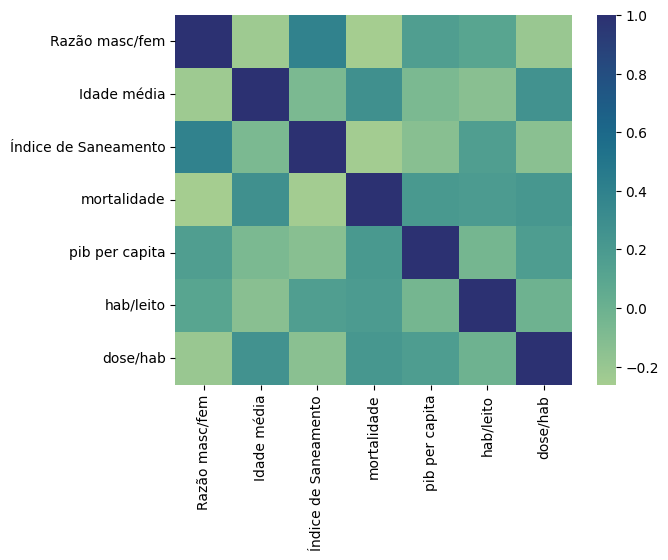

In [52]:
correlation = dfr.corr()


sns.heatmap(correlation,
            xticklabels = correlation.columns,
           yticklabels = correlation.columns,
            cmap="crest")

correlation

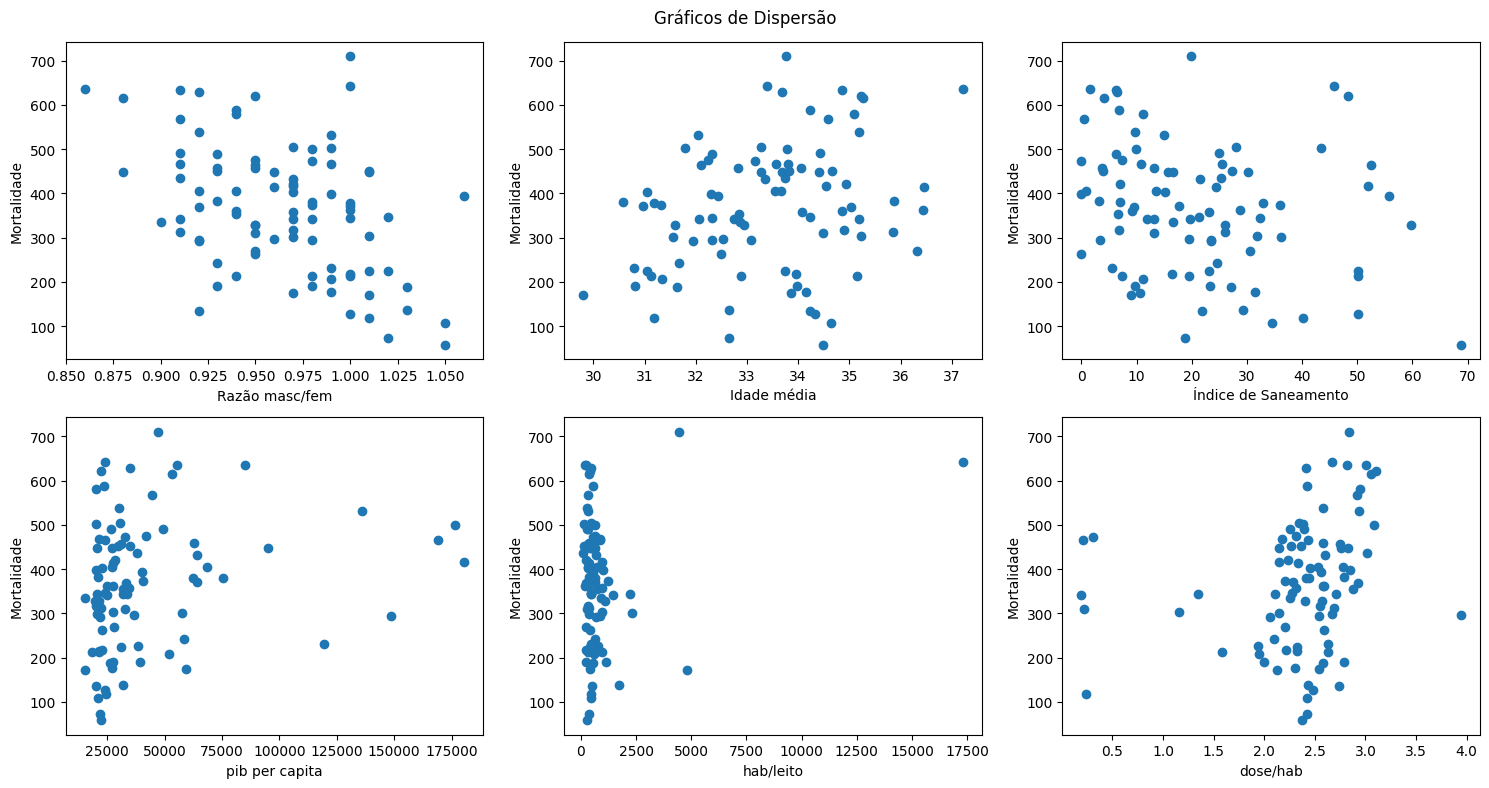

In [53]:
plt.figure(figsize=(15, 8))  # Ajusta o tamanho da figura

plt.suptitle("Gráficos de Dispersão")

plt.subplot(231)
plt.scatter(df["Razão masc/fem"], df["mortalidade"])
plt.xlabel("Razão masc/fem")
plt.ylabel("Mortalidade")

plt.subplot(232)
plt.scatter(df["Idade média"], df["mortalidade"])
plt.xlabel("Idade média")
plt.ylabel("Mortalidade")

plt.subplot(233)
plt.scatter(df["Índice de Saneamento"], df["mortalidade"])
plt.xlabel("Índice de Saneamento")
plt.ylabel("Mortalidade")

plt.subplot(234)
plt.scatter(df["pib per capita"], df["mortalidade"])
plt.xlabel("pib per capita")
plt.ylabel("Mortalidade")

plt.subplot(235)
plt.scatter(df["hab/leito"], df["mortalidade"])
plt.xlabel("hab/leito")
plt.ylabel("Mortalidade")

plt.subplot(236)
plt.scatter(df["dose/hab"], df["mortalidade"])
plt.xlabel("dose/hab")
plt.ylabel("Mortalidade")

plt.tight_layout()  # evitar sobreposições
plt.show()

In [ ]:
labels = dfr.drop(columns=['MUNICÍPIO'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(labels)
dfn = scaler.transform(labels)
plt.plot(dfn)
dfn

In [59]:
X = np.matrix(labels)
X = np.asarray(X)
S = np.cov(np.transpose(X))

In [60]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [61]:
PCA1 = pca.transform(X)[:,0]
df['PCA1'] = PCA1

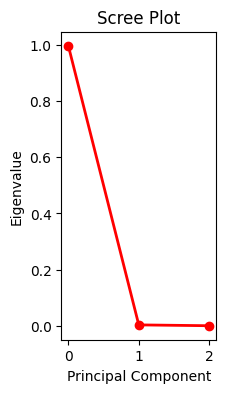

In [64]:
# 3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?

pca.explained_variance_ratio_.cumsum()

fig = plt.figure(figsize=(2,4))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

In [ ]:
labels.sort_values(by='PCA1')